In [1]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import MDAnalysis as mda
from tqdm import tqdm
from numpy import linalg as LA

In [2]:
runs = sorted(glob.glob("../../md_runs/run_comp_0*"))

In [6]:
df = []

for run in runs:
    pdb_file = run + '/comp.pdb'
    dcd_file = run + '/output.dcd'

    run_base = os.path.basename(run)
    print(run_base)
    run_label = run_base.split("_")[2]
#     if int(run_label) < 14:
#         continue

    mda_traj = mda.Universe(pdb_file, dcd_file)

    nsp16 = mda_traj.segments[0].atoms
    nsp10 = mda_traj.segments[1].atoms
    no_sol = mda_traj.select_atoms("protein")
    dist_list = []
    for ts in mda_traj.trajectory:
        box_edge = ts.dimensions[0]
        box_center = box_edge / 2
        trans_vec = box_center - np.array(nsp16.center_of_mass())
        no_sol.atoms.translate(trans_vec).wrap()
        trans_vec = box_center - np.array(no_sol.center_of_mass())
        no_sol.atoms.translate(trans_vec).wrap()
        dist_vec = no_sol.segments[0].atoms.center_of_mass() - no_sol.segments[1].atoms.center_of_mass()
        dist = LA.norm(dist_vec)

        dist_list += [dist]
    df.append({'sys_name': run_base,
#                    'frame': ts.frame,
#                    'dist_vec': dist_vec,
               'dist': dist_list})

run_comp_000
run_comp_004
run_comp_008
run_comp_012
run_comp_016
run_comp_020
run_comp_024
run_comp_028
run_comp_032
run_comp_036
run_comp_040
run_comp_044
run_comp_048
run_comp_052
run_comp_056
run_comp_060
run_comp_064
run_comp_068
run_comp_072
run_comp_076


In [7]:
df = pd.DataFrame(df)
df

,sys_name,dist
0,run_comp_000,"[32.305897869508975, 32.09674622818497, 32.667..."
1,run_comp_004,"[32.48915186858505, 31.987534965491317, 32.457..."
2,run_comp_008,"[32.20553142770242, 32.11622833038644, 32.3829..."
3,run_comp_012,"[32.5311861254614, 32.363330919895716, 32.6056..."
4,run_comp_016,"[32.263143542798154, 32.323081131599494, 32.38..."
5,run_comp_020,"[32.30494263769909, 32.34459954663319, 32.6020..."
6,run_comp_024,"[33.38007746305397, 32.84069759914652, 33.1656..."
7,run_comp_028,"[33.80389029199612, 33.81348764943528, 33.8207..."
8,run_comp_032,"[34.21200544628988, 33.895578001843575, 34.287..."
9,run_comp_036,"[34.137328247490565, 34.05310380648564, 33.804..."


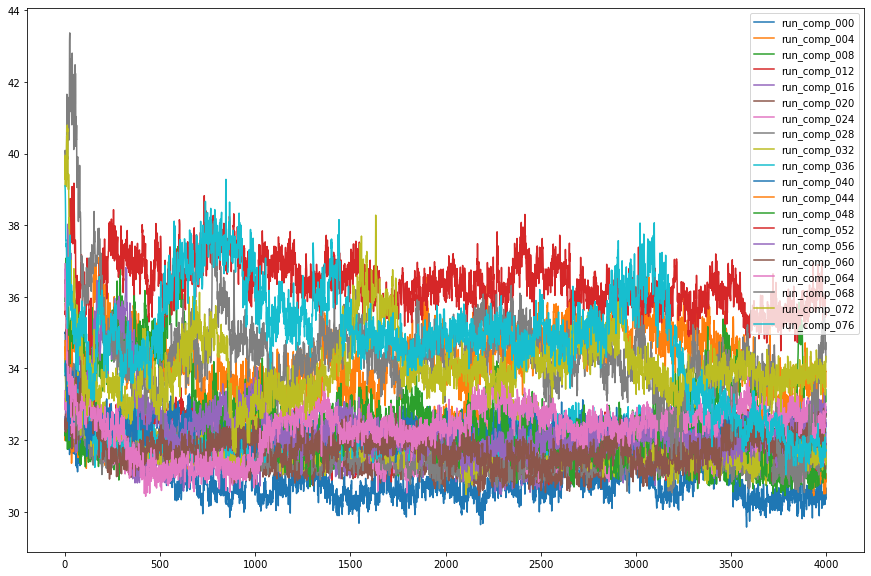

In [8]:
fig, ax = plt.subplots(figsize=(15,10)) 
n_traj = 0 

for i, row in df.iterrows(): 
    ax.plot(row['dist'], label=row['sys_name']) 
plt.legend()
plt.savefig('dist.pdf')

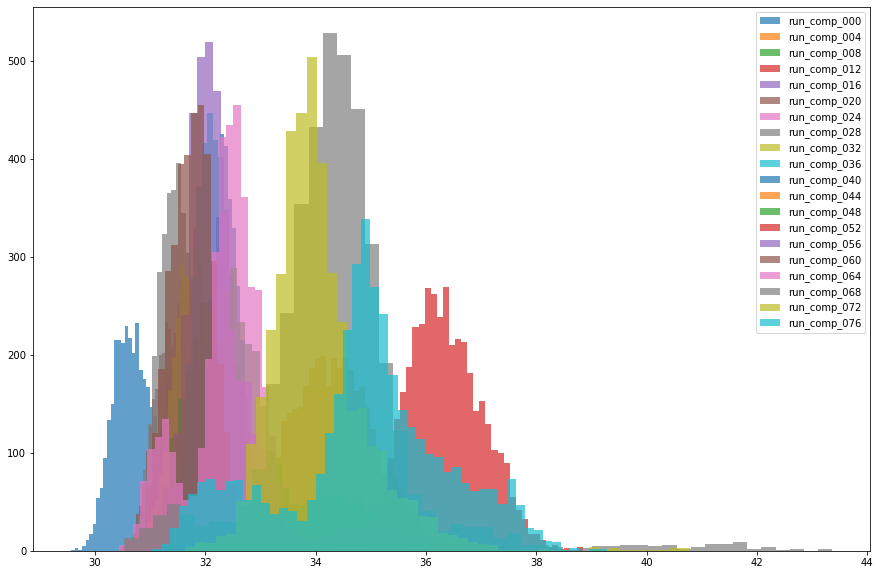

In [9]:
fig, ax = plt.subplots(figsize=(15,10)) 
n_traj = 0 

for i, row in df.iterrows(): 
    _ = ax.hist(row['dist'], bins=50, label=row['sys_name'], alpha=.7) 
plt.legend()
plt.savefig('dist_hist.pdf')

No handles with labels found to put in legend.


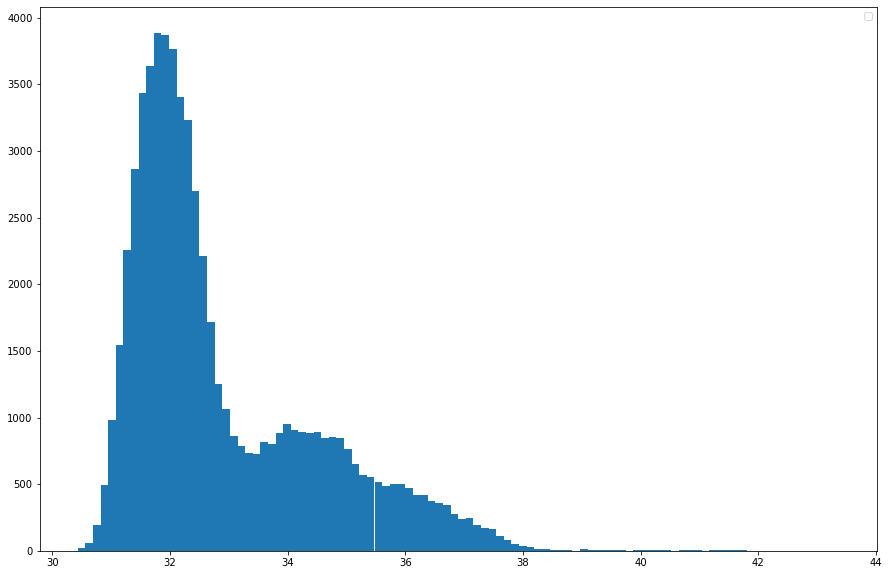

In [30]:
fig, ax = plt.subplots(figsize=(15,10)) 
n_traj = 0 

_ = ax.hist(np.hstack(df['dist']), bins=100) 
plt.legend()
plt.savefig('dist_his.pdf')

In [ ]:
fig, ax = plt.subplots(figsize=(15,10)) 
n_traj = 0 

for i, row in df.iterrows(): 
    _ = ax.hist(row['dist'], bins=50, label=row['sys_name']) 
plt.legend()
plt.savefig('dist_his.pdf')

In [7]:
np.save('dist.npy', dist_profs) 

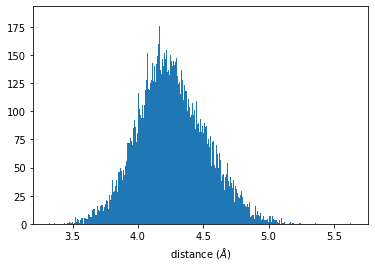

In [10]:
_ = plt.hist(dist[:,1], bins=1000)
# plt.xlim([3,8])
plt.xlabel(r'distance ($\AA$)')
plt.savefig('dist_hist.pdf')

In [6]:
%run ~/.matplotlib.py

In [7]:
frame_mini_RMSD = np.argmin(np.vstack(rmsd_profs)[:,2])

print np.min(np.vstack(rmsd_profs)[:,2])

traj_dict = {}
for traj_file in tqdm(sorted(traj_files[:])): 
    mda_traj = mda.Universe(pdb_file, traj_file) 
    traj_dict[traj_file] = len(mda_traj.trajectory)

from utils import find_frame, write_pdb_frame 
frame_mini_RMSD = np.argmin(np.vstack(rmsd_profs)[:,2])
traj_frame = find_frame(traj_dict, frame_mini_RMSD) 
print traj_frame

write_pdb_frame(traj_frame[0], pdb_file, traj_frame[1], 'low_RMSD.pdb')

 43%|████▎     | 27/63 [00:00<00:00, 131.58it/s]

0.4989168774386229


100%|██████████| 63/63 [00:00<00:00, 128.87it/s]


('../2F4K-0-protein/2F4K-0-protein-054.dcd', 734)


'low_RMSD.pdb'

/Users/hm/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


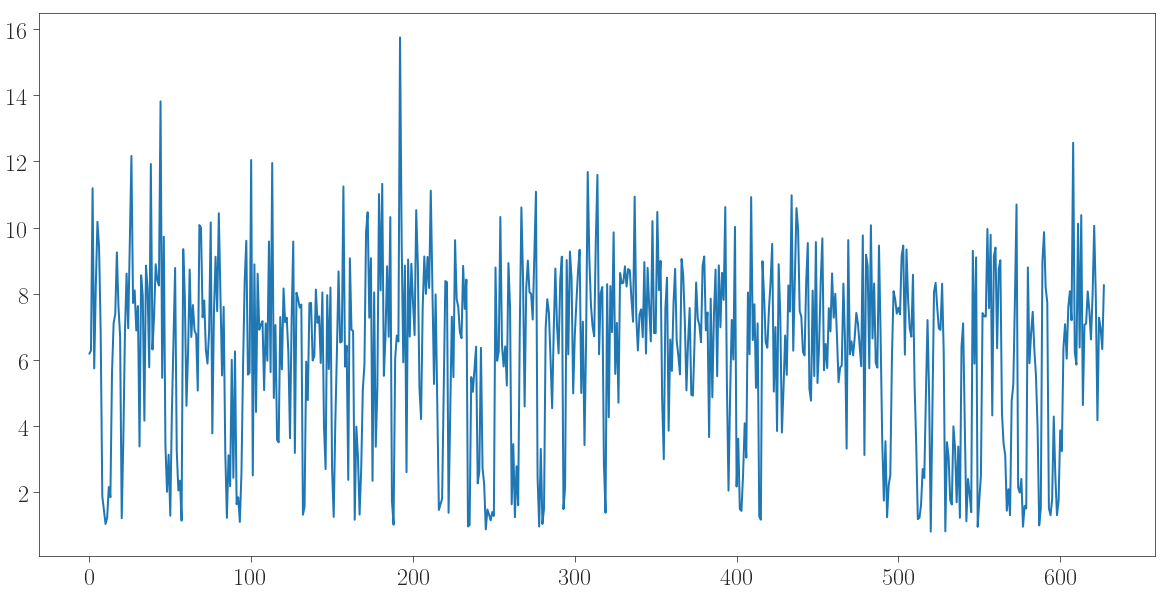

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(np.vstack(rmsd_profs)[::1000,2])

In [9]:
hist, bin_edges = np.histogram(rmsd_inst.rmsd[:,2], bins=50)

In [10]:
bin_labels = np.digitize(rmsd_inst.rmsd[:,2], bin_edges)

```python 
import MDAnalysis
from MDAnalysis.tests.datafiles import PDB, XTC

u = MDAnalysis.Universe(PDB, XTC)
protein = u.select_atoms("protein")
with MDAnalysis.Writer("protein.xtc", protein.n_atoms) as W:
    for ts in u.trajectory:
        W.write(protein)
```

In [11]:
np.unique(bin_labels, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51]),
 array([ 24,  57,  50,  40,  63,  85, 162, 215, 260, 308, 421, 444, 495,
        573, 550, 563, 535, 460, 409, 360, 374, 270, 241, 228, 143, 115,
         82,  62,  58,  36,  31,  25,  31,  26,  15,  11,  17,  19,  10,
          6,   6,  11,   7,   1,   3,   1,   1,   1,   1,   1]))

In [12]:
hist

array([ 24,  57,  50,  40,  63,  85, 162, 215, 260, 308, 421, 444, 495,
       573, 550, 563, 535, 460, 409, 360, 374, 270, 241, 228, 143, 115,
        82,  62,  58,  36,  31,  25,  31,  26,  15,  11,  17,  19,  10,
         6,   6,  11,   7,   1,   3,   1,   1,   1,   1,   1])

In [13]:
with mda.Writer('VHP.pdb', mda_traj.atoms.n_atoms) as W: 
    for label in range(10, 50): 
        frame_indices = np.array(np.where(bin_labels == label+1)).flatten()
        # Number of frame to output 
        n_frame = np.round(hist[label]/float(sum(hist[10:])) * 100)
        for i in range(int(n_frame)): 
            label = np.random.choice(frame_indices) 
            mda_traj.trajectory[label] 
            W.write(mda_traj.atoms)
        

/Users/hm/anaconda2/lib/python2.7/site-packages/MDAnalysis/coordinates/base.py:837: UserWarning: Reader has no dt information, set to 1.0 ps
  warnings.warn("Reader has no dt information, set to 1.0 ps")


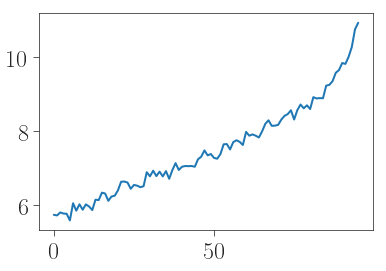

In [14]:
traj_file = 'VHP.pdb'
mda_traj = mda.Universe(pdb_file, traj_file) 
rmsd_inst = RMSD(mda_traj, ref_traj, select='protein and name CA') 
rmsd_inst.run()  

fig, ax = plt.subplots() 
ax.plot(rmsd_inst.rmsd[:,1], rmsd_inst.rmsd[:,2]) 

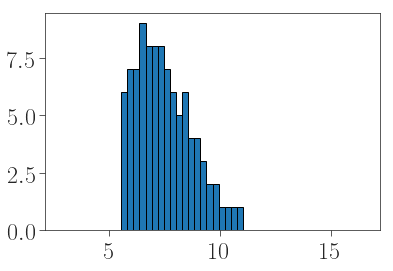

In [15]:
_ = plt.hist(rmsd_inst.rmsd[:,2], bins=bin_edges)

In [16]:
traj_dirs = sorted(glob.glob('../MD_exps/fs-pep/omm_runs_*'))

In [17]:
for traj_dir in traj_dirs[360:480]: 
    print os.listdir(traj_dir)

In [18]:
sum(np.round(hist[10:]/float(sum(hist[10:])) * 100))

96.0

In [19]:
from sklearn.decomposition import PCA
cm_pca = PCA(n_components=2).fit_transform(contact_matrices)

NameError: name 'contact_matrices' is not defined

In [ ]:
color = np.vstack(rmsd_profs)[:,2]
plt.scatter(cm_pca[:,0], cm_pca[:,1], c=color, cmap='jet', s=.5, alpha=.3)

In [ ]:
mda_traj = mda.Universe(pdb_file, traj_files) 

In [ ]:
len(mda_traj.trajectory)

In [ ]:
np.argmin(np.array(rmsd_inst.rmsd[:,2]))

In [ ]:
mda_traj.trajectory[0]

In [ ]:
mda_traj.atoms.write('vhp1ww.pdb')

In [ ]:
import simtk.openmm.app as app
import simtk.openmm as omm
import simtk.unit as u

import parmed as pmd

In [ ]:
top_file = '../MD_exps/VHP_exp/pdb/vhp1ww.top' 
pdb_file = '../MD_exps/VHP_exp/pdb/vhp1ww.pdb'

In [ ]:
pdb = pmd.load_file(top_file, xyz = pdb_file)

In [ ]:
app.PDBFile.writeFile(pdb.topology, mda_traj.atoms.positions - mda_traj.atoms.center_of_mass(), open('vhp1ww.pdb', 'w'))